In [36]:
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import date

In [37]:
# Parameters
# drift coefficent
mu = 0.5
# number of steps
n = 1000
# time in years
T = 1
# number of sims
M = 10000
# initial stock price
S0 = 100
# volatility
sigma = 0.2

In [38]:
# calc each time step
dt = T/n
# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)
# include array of 1's
St = np.vstack([np.ones(M), St])
# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St = S0 * St.cumprod(axis=0)

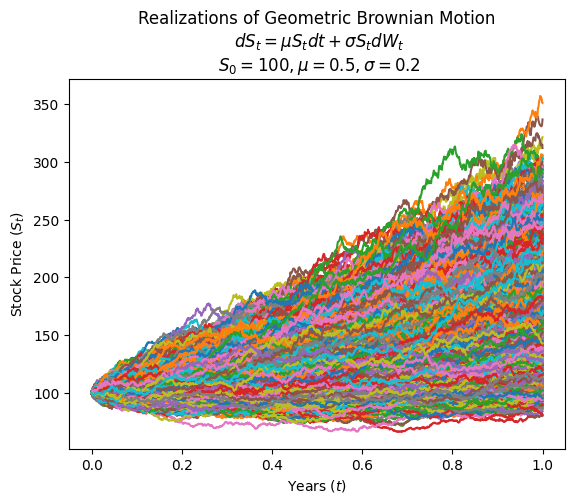

In [39]:
# Define time interval correctly 
time = np.linspace(0,T,n+1)
# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T
plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()

In [40]:
def estimate_gbm_parameters(prices: np.ndarray):

    log_returns = np.log(prices[1:] / prices[:-1])
    mu = np.mean(log_returns) * n 
    sigma = np.std(log_returns) * np.sqrt(n)

    mu_adjusted = mu + (sigma**2 / 2)

    return mu_adjusted, sigma


In [41]:
mus = []
sigmas = []

for prices in St.T:
  mu, sigma = estimate_gbm_parameters(prices)
  mus.append(mu)
  sigmas.append(sigma)
print("Estimated mu:", np.mean(mus))
print("Estimated sigma:", np.mean(sigmas))

Estimated mu: 0.5011267677639669
Estimated sigma: 0.1998893792899617


In [42]:
# dataset = []
# for path in St.T:
#     dataset.append({
#         'start': str(date(2000, 1, 1)),
#         'target': list(path)
# })
# output_file_path = f'../datasets/gbm.jsonl'
# with open(output_file_path, 'w') as file:
#     for path in dataset:
#         file.write(json.dumps(path) + '\n')


In [43]:
import statsmodels.api as sm
import pylab
from statsmodels.graphics.tsaplots import plot_acf

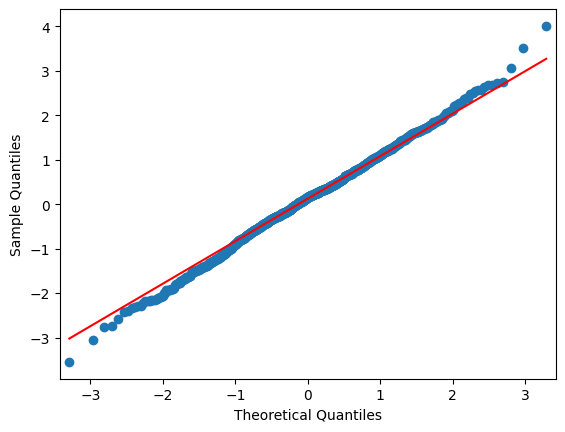

In [44]:
sm.qqplot(np.diff(St[:, 1]), line='q', a=1/2)
pylab.show()

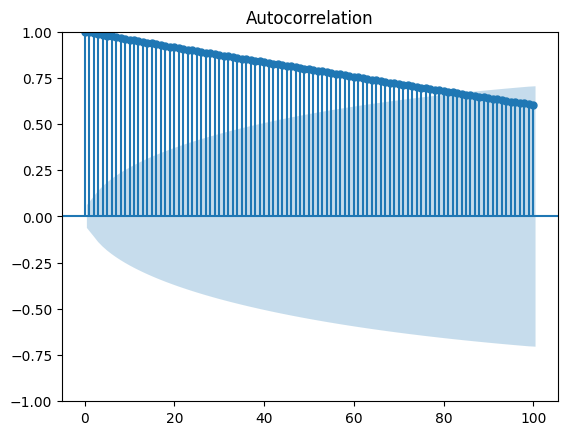

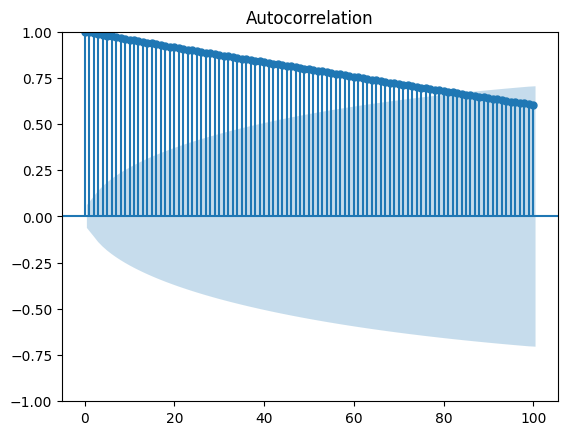

In [45]:
plot_acf(St[:, 0], lags=100)

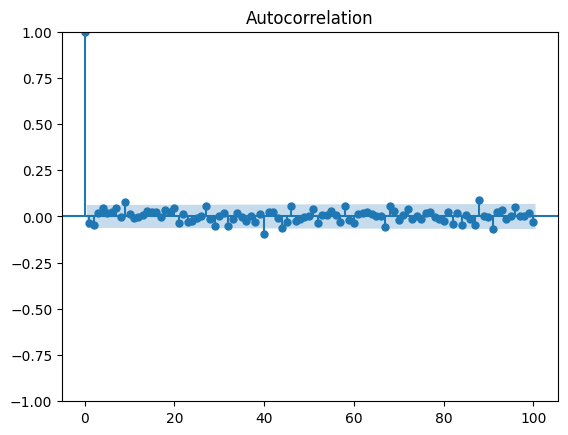

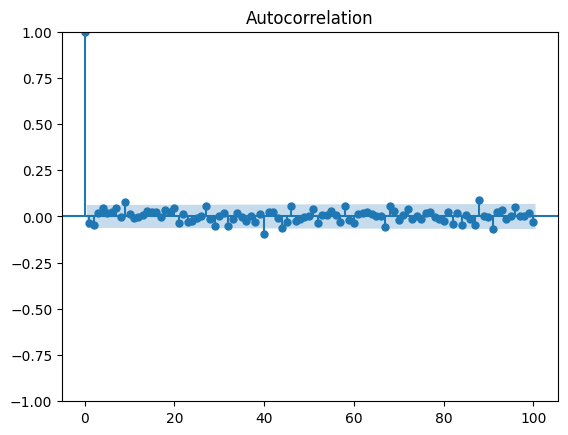

In [46]:
plot_acf(np.diff(St[:, 0]), lags=100)